In [ ]:
!pip install deep-phonemizer
!pip install torchaudio

  Preparing metadata (setup.py) ... done
  Created wheel for deep-phonemizer: filename=deep_phonemizer-0.0.19-py3-none-any.whl size=33271 sha256=0065bae4a4fe413d8043c1400c82ce7d6078be18dd02ca1a2cb9d630e1163bb5
  Stored in directory: /root/.cache/pip/wheels/c7/61/da/39b050eea5710fe32b1521b79de4a74d95896581230d30a37b
Successfully built deep-phonemizer


100%|██████████| 63.6M/63.6M [00:04<00:00, 16.3MB/s]
Downloading: "https://download.pytorch.org/torchaudio/models/tacotron2_english_phonemes_1500_epochs_wavernn_ljspeech.pth" to /root/.cache/torch/hub/checkpoints/tacotron2_english_phonemes_1500_epochs_wavernn_ljspeech.pth
100%|██████████| 107M/107M [00:00<00:00, 196MB/s] 
Downloading: "https://download.pytorch.org/torchaudio/models/wavernn_10k_epochs_8bits_ljspeech.pth" to /root/.cache/torch/hub/checkpoints/wavernn_10k_epochs_8bits_ljspeech.pth
100%|██████████| 16.7M/16.7M [00:00<00:00, 109MB/s] 


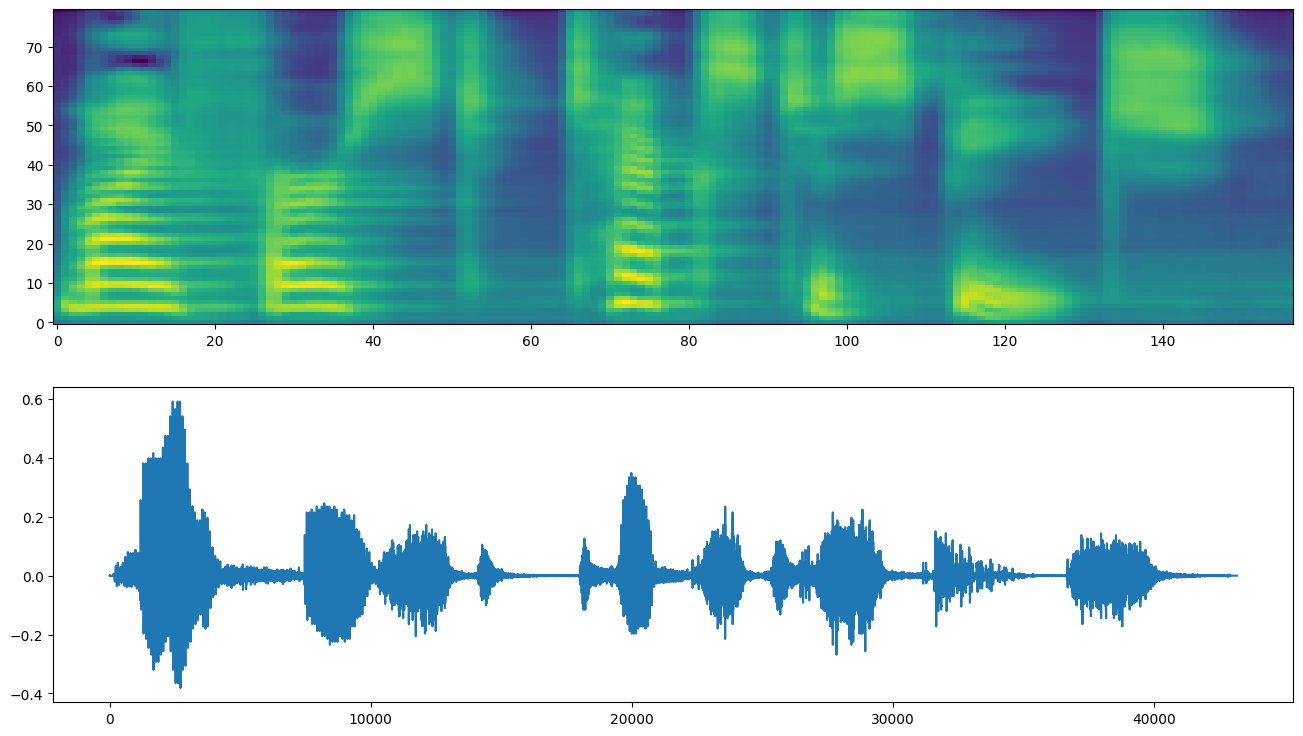

In [ ]:
import torchaudio
import torch
import matplotlib.pyplot as plt
import IPython.display

bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH

processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to("cuda:0")  # Move model to the desired device
vocoder = bundle.get_vocoder().to("cuda:0")      # Move model to the desired device

text = " My first text to speech!"

with torch.inference_mode():
    processed, lengths = processor(text)
    processed = processed.to("cuda:0")      # Move processed text data to the device
    lengths = lengths.to("cuda:0")          # Move lengths data to the device
    spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
    waveforms, lengths = vocoder(spec, spec_lengths)


fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(16, 9))
ax1.imshow(spec[0].cpu().detach(), origin="lower", aspect="auto")  # Display the generated spectrogram
ax2.plot(waveforms[0].cpu().detach())                             # Display the generated waveform7. Play the generated audio using IPython.display.Audio
IPython.display.Audio(waveforms[0:1].cpu(), rate=vocoder.sample_rate)